# Bayesian Regression

- Bayesian regression treats regression coefficients as probability distributions rather than fixed values. It updates the prior distribution, which is predefined, by incorporating information from observed data to obtain the posterior distribution.

- When using a conjugate prior, the resulting posterior distribution remains within the same family as the prior (e.g., a normal distribution), making computations straightforward and analytically tractable.

- On the other hand, with a non-conjugate prior, the posterior distribution becomes more complex and cannot be computed in a closed-form solution. In such cases, approximate inference methods such as Markov Chain Monte Carlo (MCMC), Laplace approximation, and variational inference are used to estimate the posterior distribution.

In [3]:
import kagglehub
import pymc as pm
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


In [14]:
path = kagglehub.dataset_download("abhishek14398/salary-dataset-simple-linear-regression")
dataset_path = f"{path}/Salary_dataset.csv"
data = pd.read_csv(dataset_path,index_col=0)

In [17]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


Output()

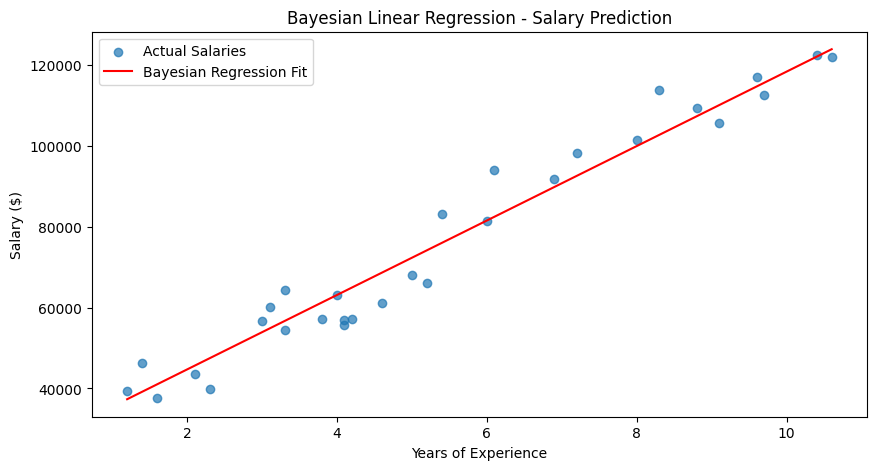

In [18]:
# Prepare Data (Convert to NumPy Arrays)
x = data['YearsExperience'].values  # Experience (Independent Variable)
y = data['Salary'].values  # Salary (Dependent Variable)


# Define Bayesian Linear Regression Model
with pm.Model() as model:
    # Priors for model parameters
    alpha = pm.Normal('alpha', mu=y.mean(), sigma=y.std())  # Prior for Intercept
    beta = pm.Normal('beta', mu=5000, sigma=2000)    # Prior for Slope
    sigma = pm.HalfNormal('sigma', sigma=y.std())  # Non-negative standard deviation

    # Linear regression model
    y_est = alpha + beta * x

    # Likelihood (Observed Data)
    likelihood = pm.Normal('Y', mu=y_est, sigma=sigma, observed=y)

    # Perform MCMC sampling using NUTS (No-U-Turn Sampler)
    trace = pm.sample(2000, tune=1000, target_accept=0.95)

# Plot Results
plt.figure(figsize=(10, 5))
plt.scatter(data['YearsExperience'], y, label="Actual Salaries", alpha=0.7)

# Compute mean posterior prediction
y_pred = trace.posterior["alpha"].mean().item() + trace.posterior["beta"].mean().item() * x

plt.plot(data['YearsExperience'], y_pred, label="Bayesian Regression Fit", color="red")
plt.xlabel("Years of Experience")
plt.ylabel("Salary ($)")
plt.title("Bayesian Linear Regression - Salary Prediction")
plt.legend()
plt.show()

Bayesian regression involves setting the prior probability, calculating the likelihood, and then computing the posterior probability. However, since calculating the posterior probability through integration is generally difficult, it is approximated using MCMC.